# Assignment 10.1

In this assignment students need to predict whether a person makes over 50K per year
or not from classic adult dataset using XGBoost. The description of the dataset is as
follows:<br>

Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions: ((AAGE>16) &&
(AGI>100) && (AFNLWGT>1)&& (HRSWK>0))<br>

Attribute Information:<br>
Listing of attributes:<br>
>50K, <=50K.<br>
age: continuous.<br>
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,
Without-pay, Never-worked.<br>
fnlwgt: continuous.<br>
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
education-num: continuous.<br>
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
Married-spouse-absent, Married-AF-spouse.<br>
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,
Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
sex: Female, Male.<br>
capital-gain: continuous.<br>
capital-loss: continuous.<br>
hours-per-week: continuous.<br>
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,
Holand-Netherlands.<br>

Following is the code to load required libraries and data:<br>
import numpy as np<br>
import pandas as pd<br>
train_set =<br>
pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.dat
a', header = None)<br>

test_set =<br>
pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
, skiprows = 1, header = None)<br>
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']<br>
train_set.columns = col_labels<br>
test_set.columns = col_labels<br>

<h2>Solution</h2>

<h3>Data Preparation</h3>

In [4]:
import numpy as np
import pandas as pd
from patsy import dmatrices
import re
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier

def func_train(x):
    if x == ' >50K':
        return 1
    else:
        return 0
    
def func_test(x):
    if x == ' >50K.':
        return 1
    else:
        return 0

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

train_set['wage_class'] = train_set['wage_class'].apply(func_train)

y_train, X_train = dmatrices('wage_class ~ age + C(workclass) + fnlwgt + C(education) + education_num + C(marital_status) + C(occupation) + C(relationship) + C(race) + C(sex) + capital_gain+capital_loss+hours_per_week', train_set, return_type="dataframe")


test_set['wage_class'] = test_set['wage_class'].apply(func_test)

y_test, X_test = dmatrices('wage_class ~ age + C(workclass) + fnlwgt + C(education) + education_num + C(marital_status) + C(occupation) + C(relationship) + C(race) + C(sex) + capital_gain+capital_loss+hours_per_week', test_set, return_type="dataframe")


<h3>Data Visualization</h3>

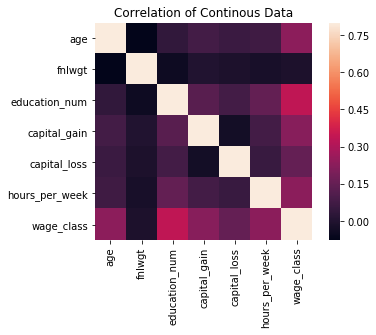

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
data_corr = train_set.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Continous Data")
plt.show()

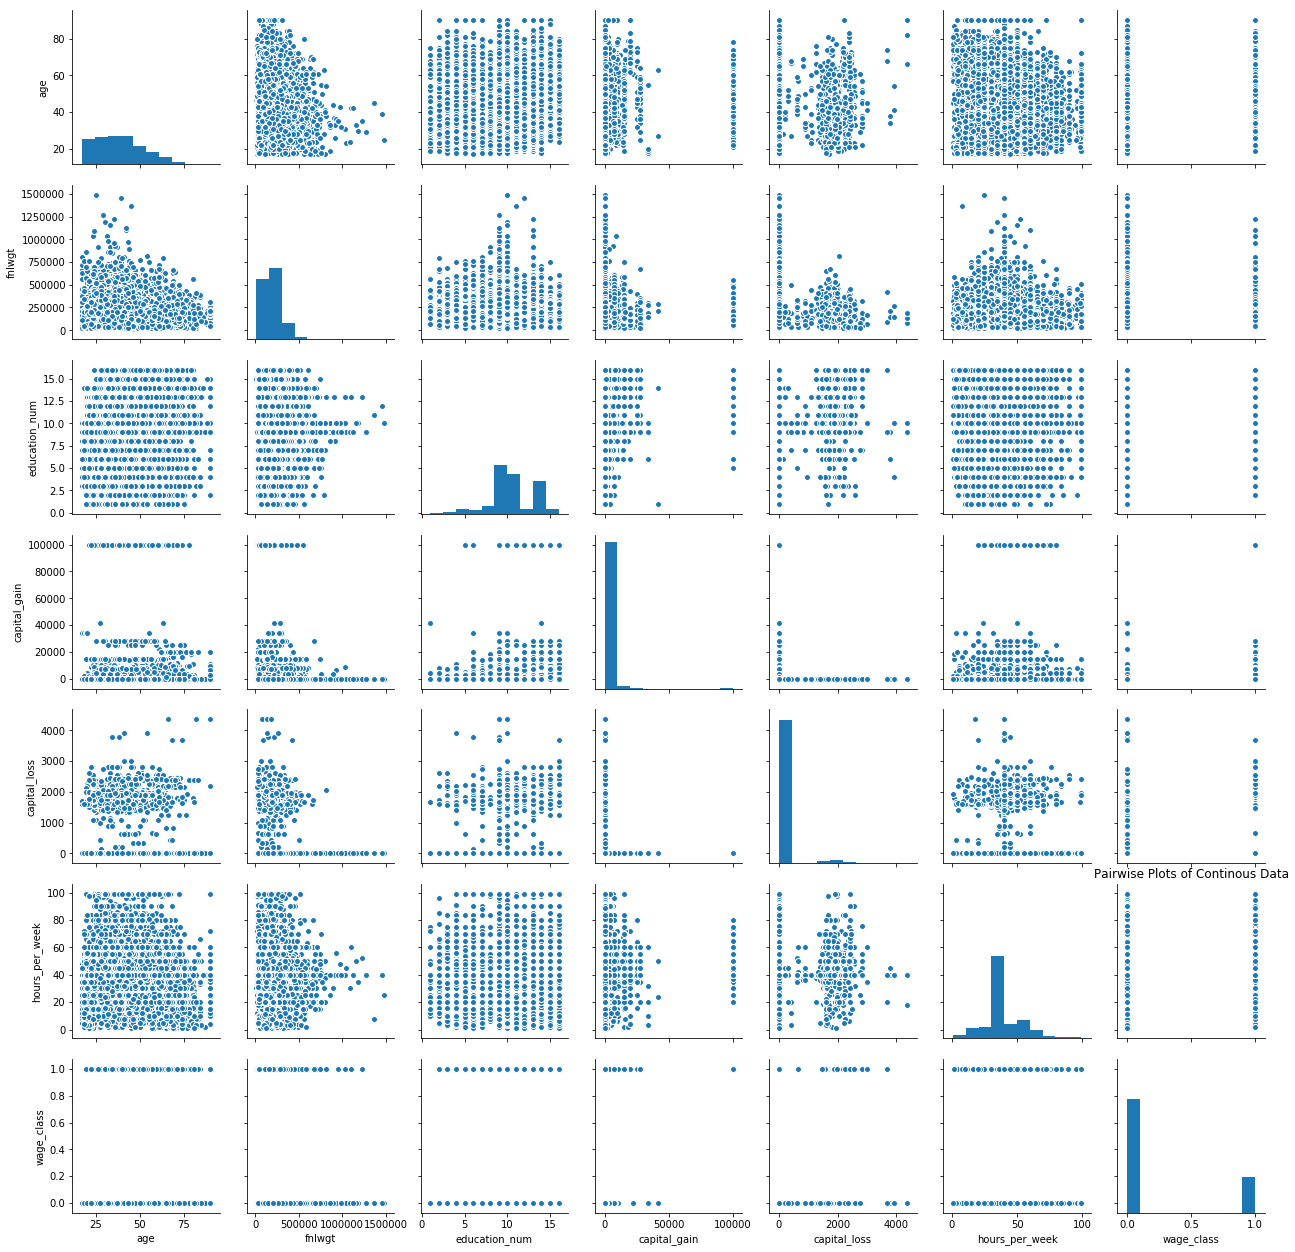

In [11]:
pp = sns.pairplot(data=train_set)
plt.title("Pairwise Plots of Continous Data")
plt.show()

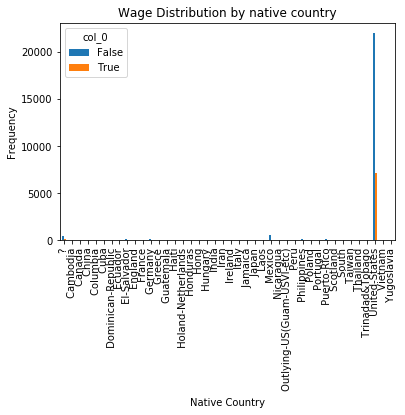

In [74]:
import matplotlib.pyplot as plt
pd.crosstab(train_set.native_country, y_train.values.reshape(y_train.values.shape[0]).astype(bool)).plot(kind='bar')
plt.title('Wage Distribution by native country')
plt.xlabel('Native Country')
plt.ylabel('Frequency')
plt.show()

Majority of values in the 'native_country' column are same. Thus, it holds little value as a feature for classification

<h3>Training the Model(XGBoost)</h3>

In [22]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

def get_dataframe(X1,X2):
    df = pd.DataFrame(columns=X1.columns)
    for column in X2.columns:
        df[column] = X2[column]
    return df



def replace_column_names(X):
    column_names = X.columns.values
    for i,name in enumerate(column_names):
        column_names[i] = re.sub('[\[\],]',' ', name)
    X.columns = column_names

replace_column_names(X_train)
replace_column_names(X_test)

X_test = get_dataframe(X_train,X_test)

y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

params = {
    'objective': ['binary:logistic'],
    'max_depth': [3,5,10],
    'learning_rate': [0.5,1.0,2.0],
    'silent': [1.0],
    'n_estimators': [5,10,20]
}

clf = GridSearchCV(XGBClassifier(), params, scoring='accuracy')

clf.fit(X_train, y_train)

print("Best Parameters for XGBoost are ", clf.best_params_)

Best Parameters for XGBoost are  {'silent': 1.0, 'max_depth': 5, 'n_estimators': 20, 'objective': 'binary:logistic', 'learning_rate': 0.5}


XGBoost accuracy on test data is  0.8740249370431792
The most important feature is age


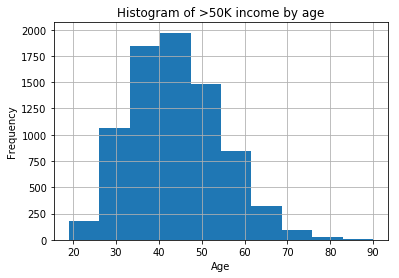

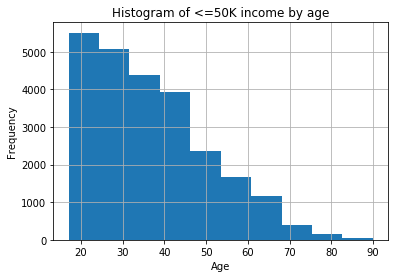

In [18]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'learning_rate': 0.5,
    'silent': 1.0,
    'n_estimators': 20
}

bst = XGBClassifier(**params).fit(X_train, y_train)

y_pred = bst.predict(X_test)

acc = accuracy_score(y_test,y_pred)

print("XGBoost accuracy on test data is ",acc)

print("The most important feature is " + X_train.columns[np.argmax(bst.feature_importances_,axis=0)])

train_set[train_set['wage_class'] == 1].age.hist()
plt.title('Histogram of >50K income by age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


train_set[train_set['wage_class'] == 0].age.hist()
plt.title('Histogram of <=50K income by age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [21]:
from sklearn.metrics import classification_report
target_names = ['<=50K','>50K']
print(classification_report(y_test,y_pred,target_names=target_names))

             precision    recall  f1-score   support

      <=50K       0.90      0.94      0.92     12435
       >50K       0.78      0.64      0.71      3846

avg / total       0.87      0.87      0.87     16281



<h3>Training the Model(XGBoost with multiple Evaluation Metrics)</h3>

In [81]:
import xgboost as xgb
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'learning_rate': 0.5,
    'silent': True,
    'n_estimators': 20
}

num_rounds = 5
dtrain = xgb.DMatrix(X_train.values, y_train)
dtest = xgb.DMatrix(X_test.values,y_test)
watchlist = [(dtest,'test'),(dtrain,'train')]
params['eval_metric'] = ['logloss','auc']
bst2 = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-logloss:0.474522	test-auc:0.887272	train-logloss:0.473903	train-auc:0.891404
[1]	test-logloss:0.389167	test-auc:0.901237	train-logloss:0.388835	train-auc:0.903555
[2]	test-logloss:0.34787	test-auc:0.907855	train-logloss:0.347482	train-auc:0.909878
[3]	test-logloss:0.326638	test-auc:0.909618	train-logloss:0.325376	train-auc:0.91259
[4]	test-logloss:0.314964	test-auc:0.912558	train-logloss:0.312681	train-auc:0.916554
